1 . Import Libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, copy

2 . Load Dataset

In [132]:
df1 = pd.read_csv("../data/Linear Regression.csv", delimiter = ",", header = 0)
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [133]:
df1.shape

(1338, 7)

3 . Checking Null Values

In [134]:
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [135]:
for i in range(len(df1.columns)):   
    print(df1.columns[i])
    

age
sex
bmi
children
smoker
region
charges


# Preprocessing

In [136]:
df1.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [137]:
df1.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [138]:
df1.region.replace(('southwest', 'southeast', 'northwest', 'northeast'), (0, 1, 2, 3), inplace=True)
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,0,16884.92400
1,18,male,33.770,1,0,1,1725.55230
2,28,male,33.000,3,0,1,4449.46200
3,33,male,22.705,0,0,2,21984.47061
4,32,male,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,2,10600.54830
1334,18,female,31.920,0,0,3,2205.98080
1335,18,female,36.850,0,0,1,1629.83350
1336,21,female,25.800,0,0,0,2007.94500


In [139]:
df1.sex.unique()

array(['female', 'male'], dtype=object)

In [140]:
df1.sex.replace(('female', 'male'), (1, 0), inplace=True)
df1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [141]:
df1.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [142]:
Y = df1.charges
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [143]:
X = df1.drop("charges", axis = 1)
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,0


In [144]:
X.shape

(1338, 6)

In [145]:
w = 4
b = 34
# to to calculation convert to numpy array
X_train = np.array(X) 
Y_train = np.array(Y)

In [146]:
X_train

array([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ,  0.  ],
       [18.  ,  0.  , 33.77,  1.  ,  0.  ,  1.  ],
       [28.  ,  0.  , 33.  ,  3.  ,  0.  ,  1.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  0.  ,  1.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  0.  ,  0.  ],
       [61.  ,  1.  , 29.07,  0.  ,  1.  ,  2.  ]])

In [210]:
X.age

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

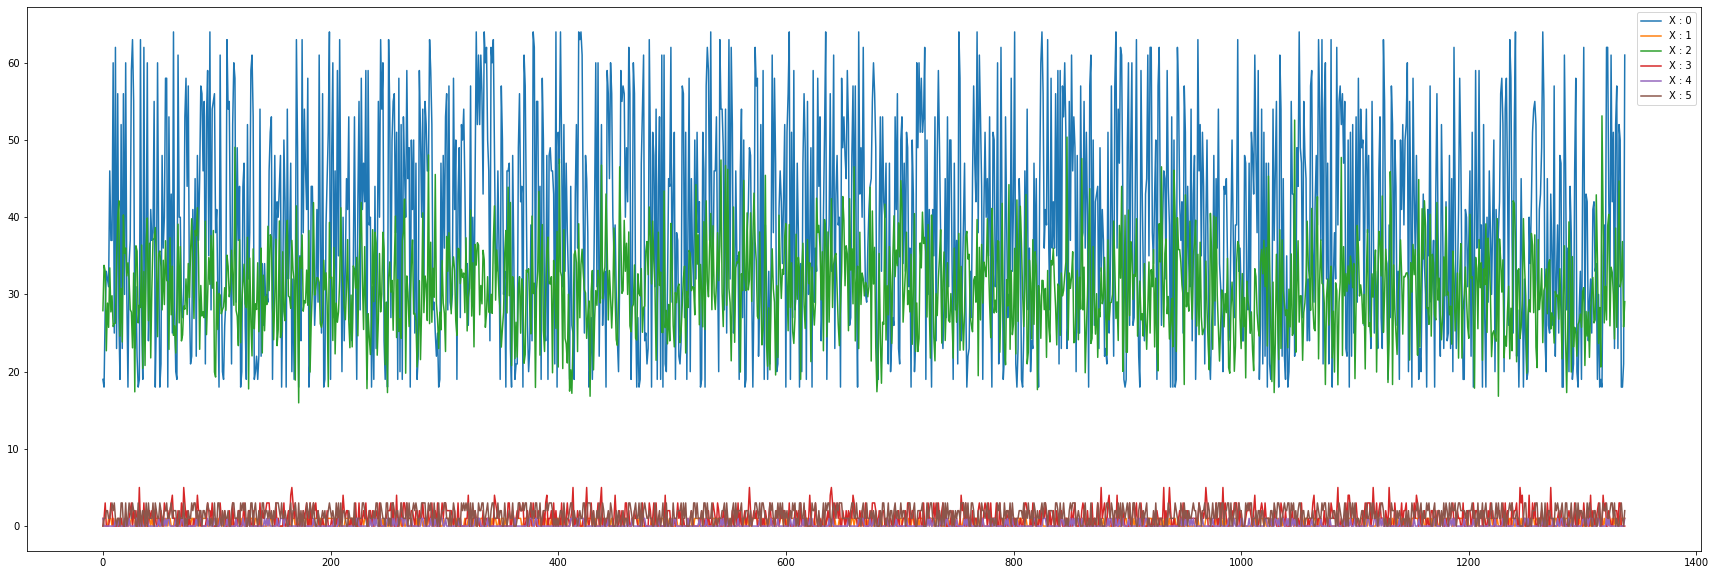

In [246]:
fig = plt.figure() 

fig.set_size_inches(30, 10)

for i in range(len(X.columns)):
    plt.plot(X.iloc[:,i], linestyle='-', label = f"X : {i}")
    
plt.legend(loc='best')
# plt.show()

In [147]:
Y_train

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [191]:
def cost_function(X, Y, w, b):

    cost = 0.0

    m = X_train.shape[0]
    
    n = X_train.shape[1]

    for i in range(m):

        f_wb = 0
        
        for j in range(n):

            f_wb_j = X[i,j] * w + b

            f_wb += f_wb_j

        cost_i = ( f_wb - Y[i] ) ** 2
        
        cost += cost_i

    cost = (cost/2 * m)

    return cost 

In [192]:
cost = cost_function(X_train, Y_train, 2.5, 21.8)

print("overall cost : " + str(cost))

overall cost : 281132289871235.2


In [197]:
m = X_train.shape[0]

n = X_train.shape[1]

y_hat = np.zeros((m, 1), dtype=float)

print(y_hat.shape)

for i in range(m):

    y_hat_ij = 0

    for j in range(n):

        y_hat_ij = X_train[i,j] * w + b
        
        y_hat[i] =  y_hat[i] + y_hat_ij


(1338, 1)


In [198]:
y_hat

array([[399.6 ],
       [419.08],
       [464.  ],
       ...,
       [431.4 ],
       [395.2 ],
       [580.28]])

In [182]:
Y_train

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [178]:
y_hat.shape

(1338, 1)

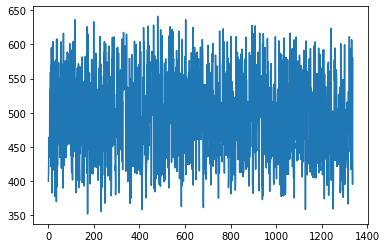

In [203]:
plt.plot(y_hat)

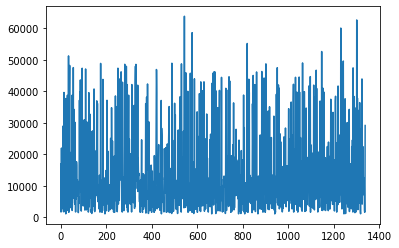

In [204]:
plt.plot(Y_train)

In [200]:
def cal_accuracy(y,y_hat):

    f_count = 0

    t_count = 0

    m = Y.shape[0]

    for i in range(m):

        if(y[i]==y_hat[i]):

            t_count += 1

        else:

            f_count +=1
            
    return (t_count/n) * 100

In [201]:
accuracy = cal_accuracy(Y_train,y_hat)
print(f"Accuracy = {accuracy} %")

Accuracy = 0.0 %


In [253]:
def compute_gradient(X, Y, w, b):

    m = X.shape[0]  

    dj_dw = 0

    dj_db = 0

    dj_dw_i = 0

    for i in range(m):  

        y_hat_i = 0     

        for j in range(n):

            y_hat_ij = X_train[i,j] * w + b
        
            y_hat_i =  y_hat_ij+ y_hat_ij

        for j in range(n):

            dj_dw_ij = (y_hat_i  - Y[i]) * X[i,j] 

            dj_dw_i = dj_dw_i + dj_dw_ij

        dj_db_i = y_hat_i  - Y[i] 

        dj_db += dj_db_i

        dj_dw += dj_dw_i 
        
    dj_dw = dj_dw / m 
    
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [254]:
dj_dw, dj_db = compute_gradient(X_train, Y_train, w, b)
print("dj_dw : ", dj_dw, "| dj_db", dj_db)

dj_dw :  -699291910.4822786 | dj_db -13190.547825679372


In [255]:
def gradient_descent(X, Y,  w_in, b_in, learning_rate, num_iters, compute_gradient, cost_function):

    w = copy.deepcopy(w_in) # avoid modifying global w_in

    cost_history = []
    param_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, Y, w, b)

        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        if i<100000: 
            cost_history.append( cost_function(X, Y, w , b))
            param_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:

            print(  f" Iteration {i:4}: Cost {cost_history[-1]:0.2e} ",
                    f" dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                    f" w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, cost_history, param_history 

In [263]:
w_initial = 50.0
b_initial = 4.0
learning_rate = 0.01
num_iters = 20
w_, b_, cost_history, param_history  = gradient_descent(X_train, Y_train,  w_initial, w_initial, learning_rate, num_iters, compute_gradient, cost_function)

 Iteration    0: Cost 2.40e+23   dj_dw: -6.910e+08, dj_db: -1.302e+04    w:  6.910e+06, b: 1.80220e+02
 Iteration    2: Cost 1.10e+36   dj_dw: -1.483e+15, dj_db: -3.003e+10    w:  1.482e+13, b: 3.00133e+08
 Iteration    4: Cost 5.08e+48   dj_dw: -3.184e+21, dj_db: -6.447e+16    w:  3.182e+19, b: 6.44297e+14
 Iteration    6: Cost 2.34e+61   dj_dw: -6.836e+27, dj_db: -1.384e+23    w:  6.831e+25, b: 1.38312e+21
 Iteration    8: Cost 1.08e+74   dj_dw: -1.467e+34, dj_db: -2.971e+29    w:  1.466e+32, b: 2.96915e+27
 Iteration   10: Cost 4.97e+86   dj_dw: -3.150e+40, dj_db: -6.378e+35    w:  3.148e+38, b: 6.37389e+33
 Iteration   12: Cost 2.29e+99   dj_dw: -6.762e+46, dj_db: -1.369e+42    w:  6.758e+44, b: 1.36829e+40
 Iteration   14: Cost 1.06e+112   dj_dw: -1.452e+53, dj_db: -2.939e+48    w:  1.451e+51, b: 2.93731e+46
 Iteration   16: Cost 4.87e+124   dj_dw: -3.116e+59, dj_db: -6.310e+54    w:  3.114e+57, b: 6.30554e+52
 Iteration   18: Cost 2.24e+137   dj_dw: -6.690e+65, dj_db: -1.355e+61 

In [264]:
w_

-9.795018220082565e+66

In [265]:
b_

-1.9832689564480818e+62

In [274]:
m = X_train.shape[0]

n = X_train.shape[1]

y_new = np.zeros((m, 1), dtype=float)

print(y_new.shape)

for i in range(m):

    y_hat_ij = 0

    for j in range(n):

        y_hat_ij = X_train[i,j] * w_ + b_
        
        y_new[i] =  y_hat[i] + y_hat_ij

(1338, 1)


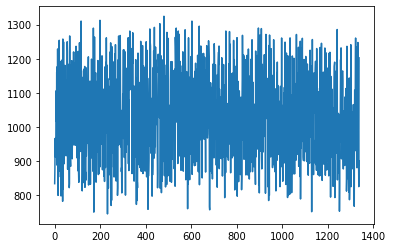

In [271]:
plt.plot(y_new)

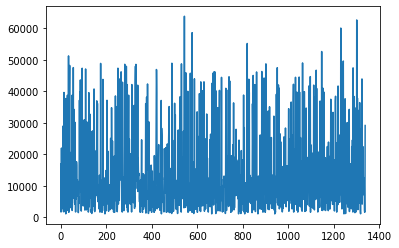

In [267]:
plt.plot(Y_train)